In [1]:
select_features=False

In [2]:
run load-clean-select.ipynb

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Morphology was measured for 1029.0 cells.

The numbers of cells and nuclei correspond to each other.

The are no duplicated column names: True
The are no duplicated column names: True
Cytoplasm measurements were taken for 1029 cells.

The are no duplicated column names: True
Reading the dataset with E-cadherin...
E-cadherin was measured for 546 cells.

The are no duplicated column names: True
Reading the dataset with Vimentin and Cytokeratins...
Vimentin and Cytokeratins were measured for 483 cells.

The are no duplicated column names: True

Full dataset has shape: (1029, 562)
Initial shape is: (1029, 562)
Features with zero variance:
 Index(['centerZ_cell', 'eulernumber_cell', 'children_cytoplasm_count_cell',
       'loc_centermassintensityZ_wga', 'loc_centerZ_cell',
       'loc_maxintensityZ_wga', 'centerZ_nucl', 'eulernumber_nucl',
       'children_cells_count', 'children_cytoplasm_count_nucl',
       'loc_centermassintensityZ_dapi', 'loc_centerZ_nucl',
       'loc_maxintensityZ_dap

In [24]:
df = measurements[measurements.stiffness == "64.0"].copy().reset_index(drop=True)

In [25]:
df['clumped'] = 0

for image in clumped.image.unique():
    df.loc[df.image == image, 'clumped'] = 1

df.clumped.sum()

73

# Compare geometric parameters

In [107]:
s_corr = df[geom_cols].corrwith(pd.to_numeric(df.clumped))
fts = s_corr.abs().sort_values(ascending=False).head(13)
fts

neighbors_percenttouching_3           0.663801
neighbors_percenttouching_30          0.628723
neighbors_secondclosestdistance_20    0.620653
neighbors_numberofneighbors_30        0.597799
neighbors_secondclosestdistance_3     0.569275
neighbors_firstclosestdistance_20     0.566171
neighbors_firstclosestdistance_3      0.563116
neighbors_numberofneighbors_20        0.556557
neighbors_numberofneighbors_3         0.555367
area_cyto                             0.498115
area_cell                             0.467294
maximumradius_cyto                    0.459396
ncr                                   0.454529
dtype: float64

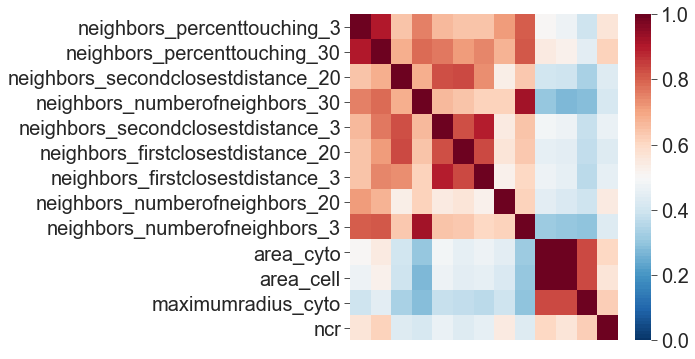

In [108]:
plt.rcParams['figure.figsize'] = (6, 6)

sns.heatmap(df[fts.index].corr().abs(),
            vmin = 0, vmax = 1,
            cmap=sns.color_palette("RdBu_r", 100),
            cbar_kws={"aspect": 20},
            xticklabels=False, yticklabels=True);


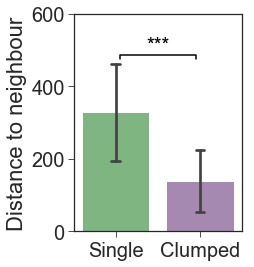

In [103]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'neighbors_secondclosestdistance_20'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 600], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Distance to neighbour");
plt.savefig('../results/Clumped distance.png', bbox_inches='tight', dpi=300);

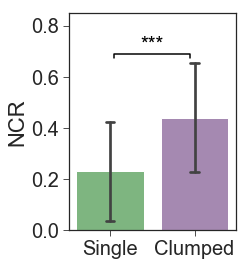

In [104]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'ncr'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 0.85], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("NCR");
plt.savefig('../results/Clumped NCR.png', bbox_inches='tight', dpi=300);

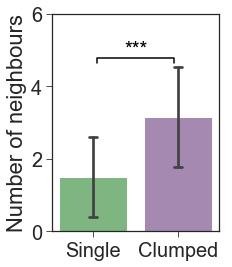

In [105]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'neighbors_numberofneighbors_3'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 6], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Number of neighbours");
plt.savefig('../results/Clumped neighbours.png', bbox_inches='tight', dpi=300);

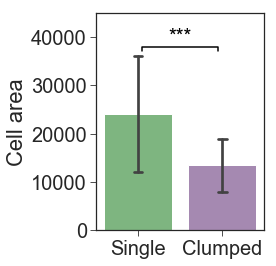

In [106]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'area_cell'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 45000], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Cell area");
plt.savefig('../results/Clumped area.png', bbox_inches='tight', dpi=300);

# Compare expression of biomarkers

** E-cadherin**

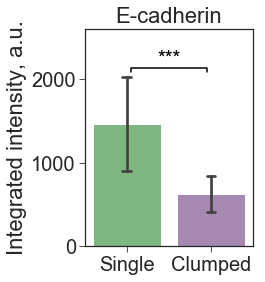

In [37]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'integratedintensity_ecad'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 2600], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Integrated intensity, a.u.");
plt.title("E-cadherin");
plt.savefig('../results/Clumped Ecad II barplot.png', bbox_inches='tight', dpi=300);

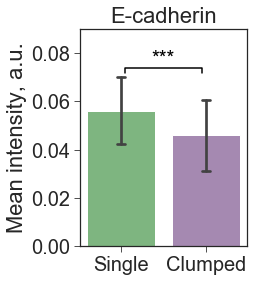

In [45]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'meanintensity_ecad'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 0.09], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Mean intensity, a.u.");
plt.title("E-cadherin");
plt.savefig('../results/Clumped Ecad MI barplot.png', bbox_inches='tight', dpi=300);

** Vimetin**

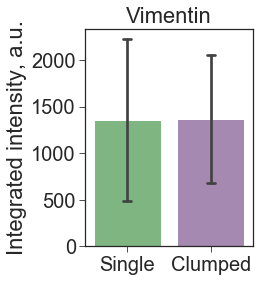

In [39]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'integratedintensity_vim'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 2600], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Integrated intensity, a.u.");
plt.title("Vimentin");
plt.savefig('../results/Clumped Vim II barplot.png', bbox_inches='tight', dpi=300);

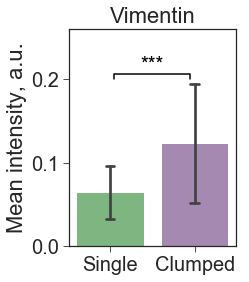

In [52]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'meanintensity_vim'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 0.26], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Mean intensity, a.u.");
plt.title("Vimentin");
plt.savefig('../results/Clumped Vim MI barplot.png', bbox_inches='tight', dpi=300);

** Cytokeratins**

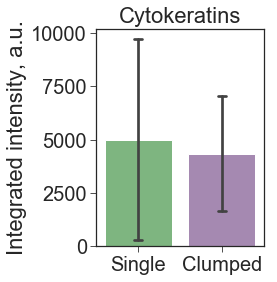

In [40]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'integratedintensity_ker'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 2600], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Integrated intensity, a.u.");
plt.title("Cytokeratins");
plt.savefig('../results/Clumped Ker II barplot.png', bbox_inches='tight', dpi=300);

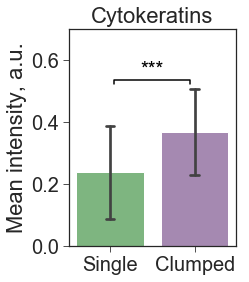

In [56]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'meanintensity_ker'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 0.7], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Mean intensity, a.u.");
plt.title("Cytokeratins");
plt.savefig('../results/Clumped Ker MI barplot.png', bbox_inches='tight', dpi=300);

** CVR**

In [109]:
df = proc.cv_ratio(df, col1='integratedintensity_ker', col2='integratedintensity_vim')

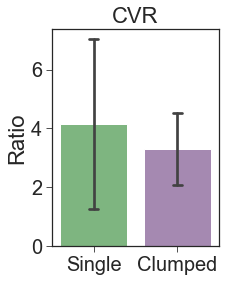

In [112]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='clumped')

col = 'cvratio'
ax = sns.barplot(x='clumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'clumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'clumped', col, x_start, x_end, signif, [0, 0.8], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Ratio");
plt.title("CVR");
plt.savefig('../results/Clumped CVR barplot.png', bbox_inches='tight', dpi=300);